# 7.2 Nerual Networks More Hidden Neurons

## Preparation

In [7]:
# Import the libraries we need for this lab

import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
# Define a function of plot 

def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [32]:
# Define a function to plot model parameters

def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

In [5]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

## Make some Data

In [52]:
# Define a data class
class Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-20, 20, 1).view(-1, 1).type(torch.Tensor)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0] > -10) & (self.x[:, 0] < -5)] = 1.0
        self.y[(self.x[:, 0] > 5) & (self.x[:, 0] < 10)] = 1.0
        self.y = self.y.view(-1, 1)
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get a length
    def __len__(self):
        return self.len

## Neural Network module and Training function

In [53]:
# Define a Neural Network class
class Net(nn.Module):
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    #Prediction
    def forward(self, x):
        x = sigmoid(self.linear1(x))
        x = sigmoid(self.linear2(x))
        return x

In [54]:
# Define a training model
def train(data_set, model, critierion, train_loader, optimizer, epochs=5, plot_number=10):
    cost = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            yhat = model(x)
            loss = critierion(yhat, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total += loss.item()
            
            if epoch % plot_number == 0:
                PlotStuff(data_set.x, data_set.y, model)
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [55]:
# Create a loss function
criterion = nn.BCELoss()

# Create a Dataset and following DataLoader
Data_set = Data()
train_loader = DataLoader(dataset=Data_set, batch_size=100)

In [56]:
# Create a model
model = Net(1, 7, 1)

# Create a optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

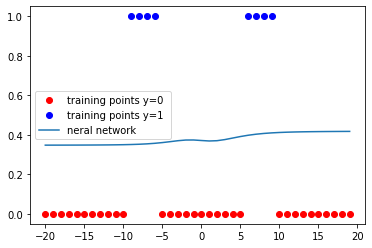

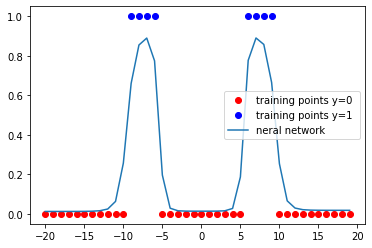

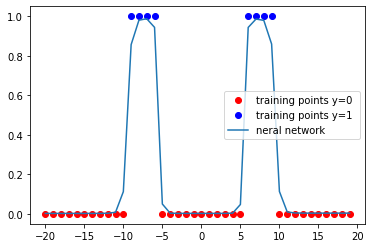

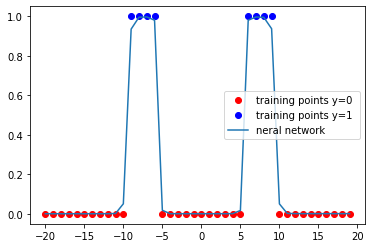

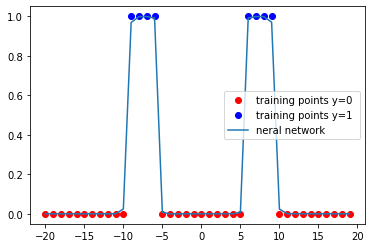

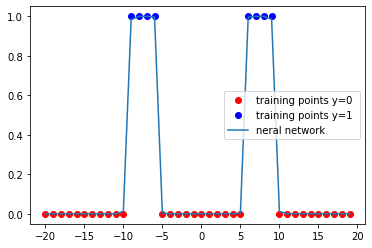

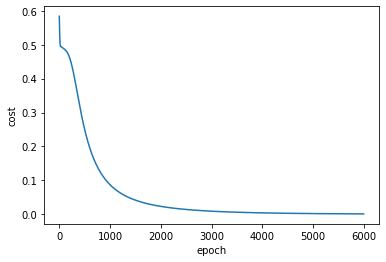

In [57]:
# train the model
COST = train(Data_set, model, criterion, train_loader, optimizer, epochs=6000, plot_number=1000)